# Guided and Leaky Modes of Hollow Core slab waveguide in C_high configuration

Essentially the N2 Bragg fiber but in 1D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from scipy.optimize import newton
%matplotlib widget
plt.style.use('dark_background')


In [118]:
A = SlabExact(scale=1e-6, Ts=[5, 10, 1, 5, 1, 10, 5],
              ns=[1.44, 1, 1.44, 1, 1.44, 1, 1.44], xrefs=[500, 500, 300, 300, 300, 500, 500],
              symmetric=True)

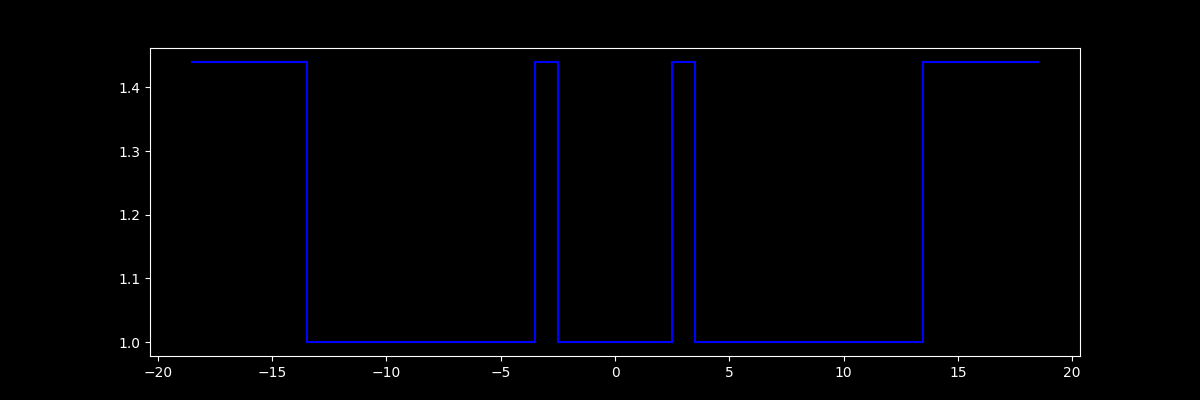

In [119]:
A.plot_refractive_index()

## Loss spike locations

In [120]:
# Formula for loss spikes from article
ms = np.arange(1, 15,1)

n1 = A.n_low  # Inner (core) index (same as outermost)
n2 = A.n_high  # Cladding index
d = A.Ts[2]  # Thickness of glass 

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls*=A.scale
Ls

array([2.07229342e-06, 1.03614671e-06, 6.90764472e-07, 5.18073354e-07,
       4.14458683e-07, 3.45382236e-07, 2.96041917e-07, 2.59036677e-07,
       2.30254824e-07, 2.07229342e-07, 1.88390311e-07, 1.72691118e-07,
       1.59407186e-07, 1.48020958e-07])

interactive(children=(FloatSlider(value=1.9686787447422697e-06, description='wl', layout=Layout(width='90%'), …

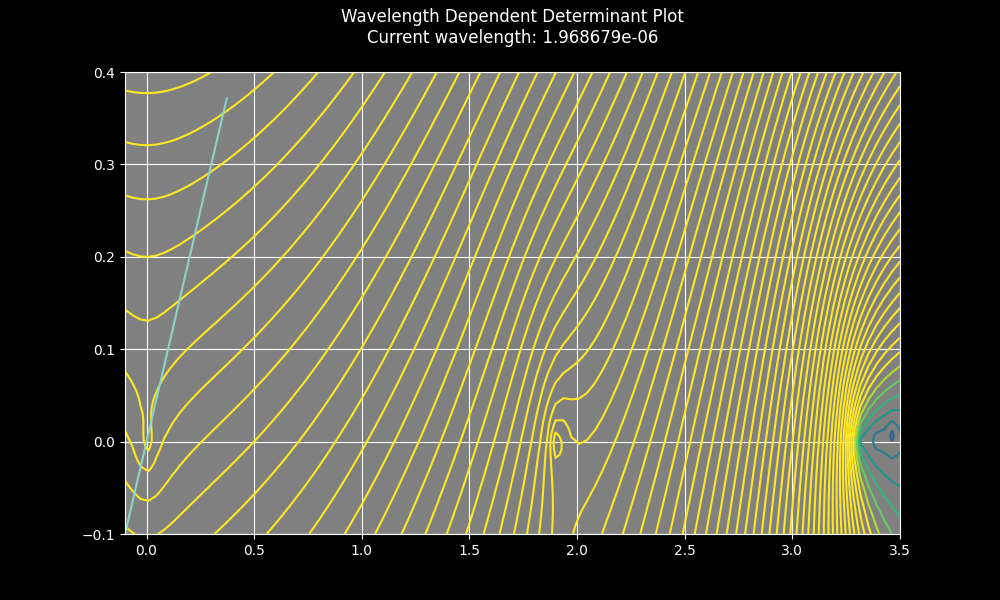

In [121]:
A.interactive_determinant_plot(.95*Ls[0], 1.1*Ls[0], 1000, rmin=-.1, rmax=3.5, imin=-.1, imax=.4)

# Leaky Mode Profiles

So we know what the fields might look like when we find them

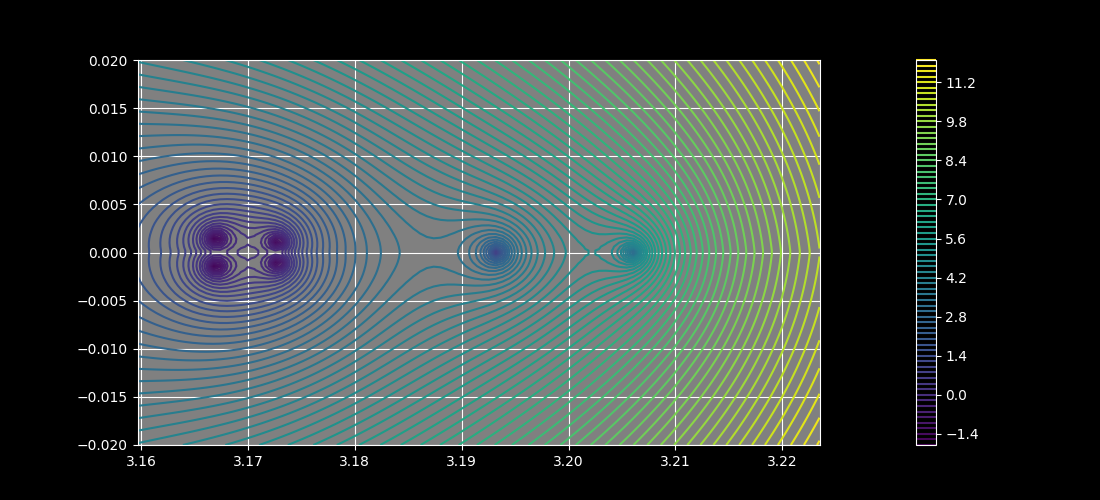

In [125]:
field_type = 'TE'
mode_type = 'leaky'
k_low = A.K_low

A.deteriminant_plot(.99*k_low, 1.01*k_low, -.02, .02, beta_plane=True)

In [126]:
beta1 = newton(A.determinant, np.array([3.205+.0001j]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta1, 'TE', mode_type)))
plt.plot(beta1.real, beta1.imag, marker='o')

beta2 = newton(A.determinant, np.array([3.195+.00025j]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta2, 'TE', mode_type)))
plt.plot(beta2.real, beta2.imag, marker='o')

beta1, beta2

2.585695964354947e-10
1.0033221153884266e-08


((3.2059884656282227-1.0182172096275507e-05j),
 (3.1932946300754548+7.807936898878573e-05j))

In [127]:
Fs1 = A.fields(beta1, field_type='TE', mode_type=mode_type)
Fs2 = A.fields(beta2.conj(), field_type='TE', mode_type=mode_type)

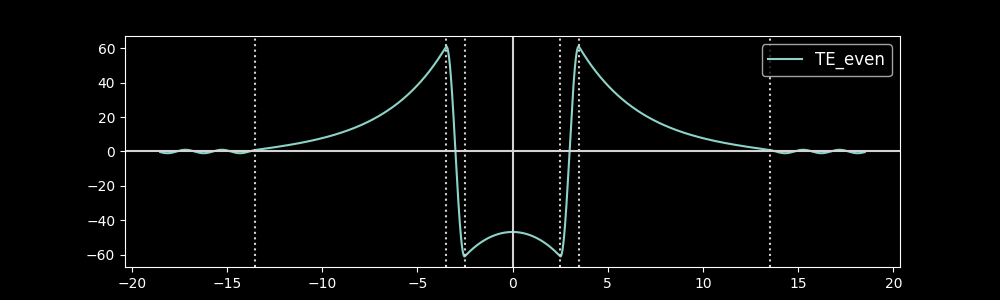

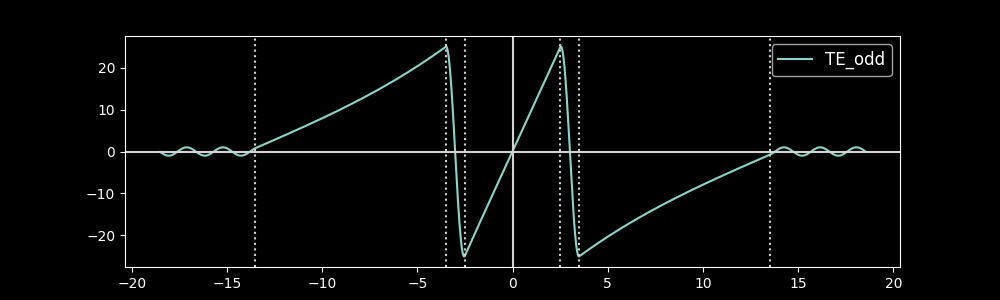

In [128]:
A.plot_field_1d(Fs1, label='TE_even', figsize=(10,3));
A.plot_field_1d(Fs2, label='TE_odd', figsize=(10,3), close_others=False);


# Guided Modes

To see how much we need to put in for that part.

interactive(children=(FloatSlider(value=1e-05, description='wl', layout=Layout(width='90%'), max=0.0001, min=1…

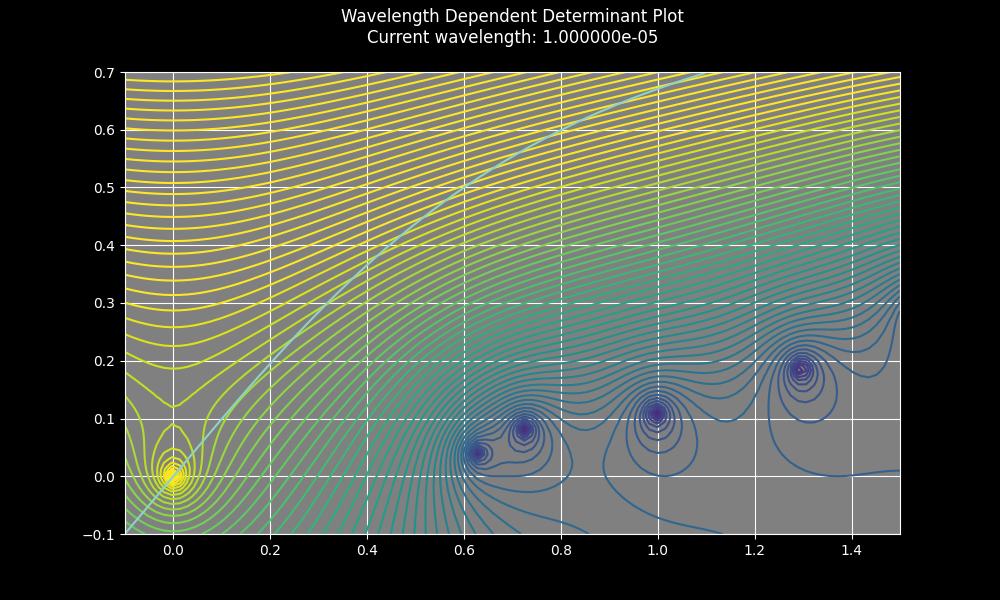

In [93]:
field_type = 'TE'
mode_type = 'guided'
k_low, k_high = A.K_low, A.K_high

A.interactive_determinant_plot(1e-5, 1e-4, 1000, rmin=-.1, rmax=1.5, imin=-.1, imax=.7)

In [43]:
beta3 = newton(A.determinant, np.array([.99*k_high]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta3, 'TE', mode_type)))

beta4 = newton(A.determinant, np.array([.95*k_high]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta4, 'TE', mode_type)))

beta5 = newton(A.determinant, np.array([.9*k_high]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta5, 'TE', mode_type)))

beta6 = newton(A.determinant, np.array([.8*k_high]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta6, 'TE', mode_type)))

beta3, beta4, beta5, beta6

3.62525979404645e-24
1.5966365479225215e-24
9.879938499216667e-24
5.933643607036332e-21


((8.94494449928761+1.0807092810252566e-17j),
 (8.631793553210262-1.7818941733102713e-17j),
 (8.094503456329138-7.84304869509142e-17j),
 (7.314617350853024-1.5852024405100663e-16j))

In [44]:
Fs3 = A.fields(beta3, field_type='TE', mode_type=mode_type, rounding=16)
Fs4 = A.fields(beta4, field_type='TE', mode_type=mode_type, rounding=16)
Fs5 = A.fields(beta5, field_type='TE', mode_type=mode_type, rounding=16)
Fs6 = A.fields(beta6, field_type='TE', mode_type=mode_type, rounding=16)

/home/pv/local/slab/slab.py:1527: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


(<Figure size 1000x300 with 1 Axes>, <Axes: >)

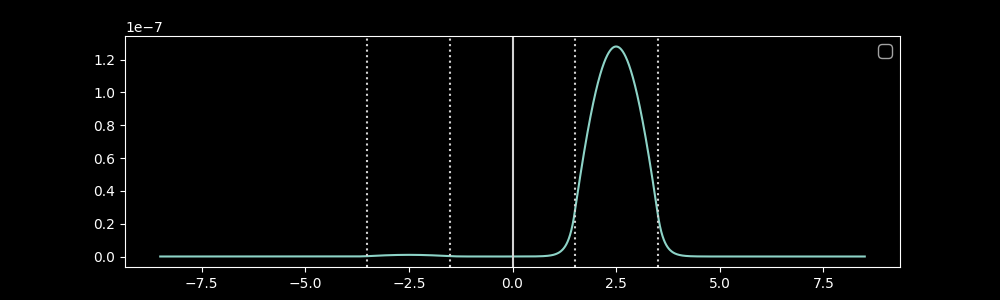

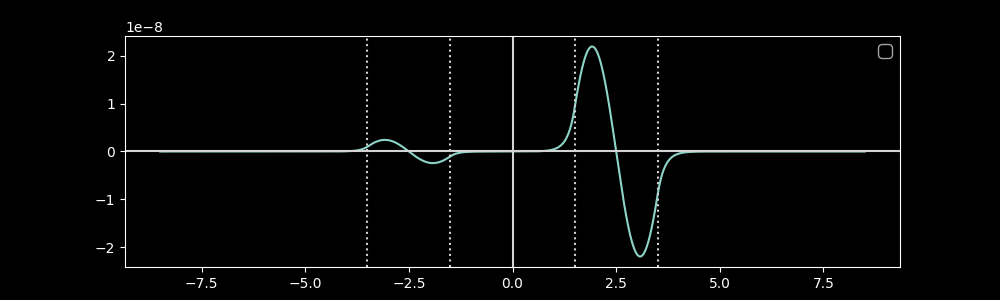

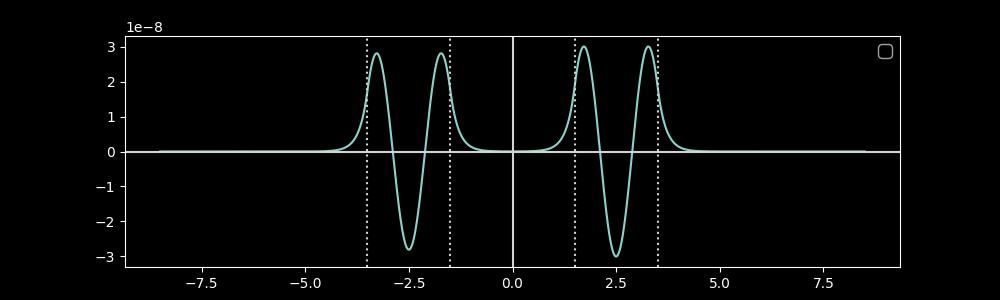

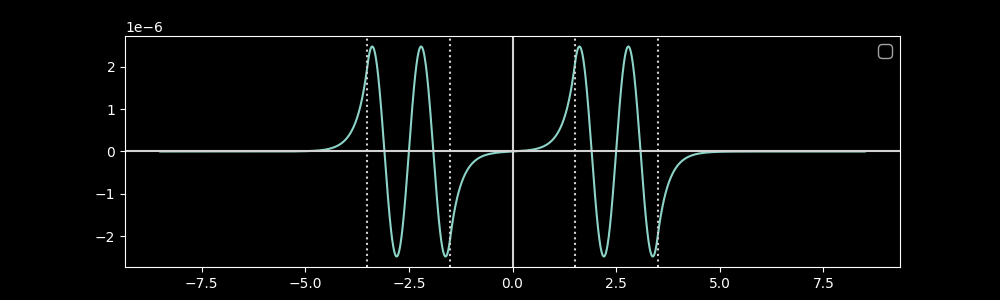

In [50]:
A.plot_field_1d(Fs3, figsize=(10,3))
A.plot_field_1d(Fs4, close_others=False, figsize=(10,3))
A.plot_field_1d(Fs5, close_others=False, figsize=(10,3))
A.plot_field_1d(Fs6, close_others=False, figsize=(10,3))


# Meniscus Modes

Those interesting new modes near klow.  These are in fact just regular guided modes of the cladding as we reach cutoff.

I checked these for Bragg, and they are there, but they really don't have much core stuff until the very last second.  Maybe that is why they don't play a significant role in transmission.

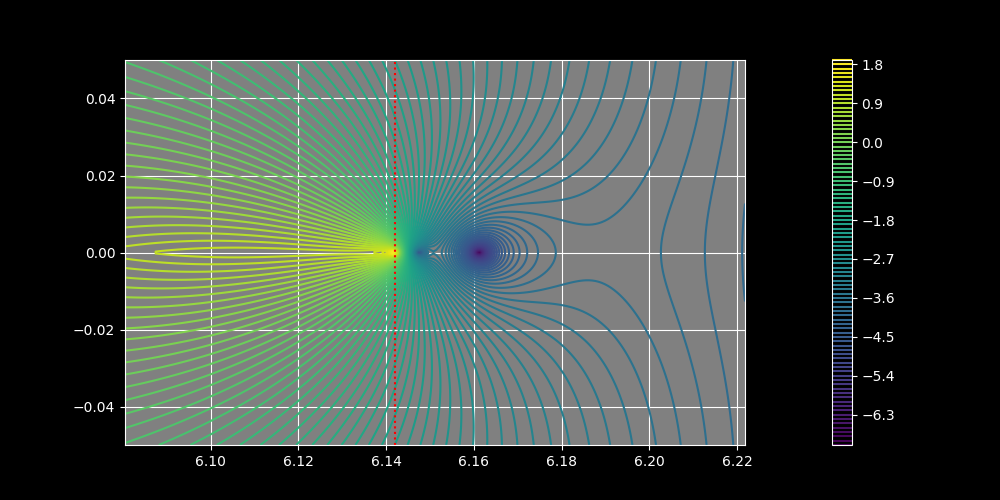

In [158]:
field_type = 'TE'
mode_type = 'guided'
A.wl = 1.023*1e-6

k_low, k_high = A.K_low, A.K_high

plotlogf(A.determinant, .99*k_low, 1.013*k_low,  -.05, .05, field_type, mode_type, iref=200, rref=200,
         levels=100, figsize=(10,5),)
plt.axvline(k_low, linestyle=':', color='r');

In [151]:
beta5 = newton(A.determinant, np.array([6.16]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta5, 'TE', mode_type)))

beta6 = newton(A.determinant, np.array([6.147]), args=('TE', mode_type))[0]
print(abs(A.determinant(beta6, 'TE', mode_type)))

beta5, beta6

6.267555942375065e-14
1.2806466295606533e-13


((6.161159147980525+2.476999171567085e-18j),
 (6.1474723571455545+8.886611588717977e-18j))

In [152]:
Fs5 = A.fields(beta5, field_type='TE', mode_type=mode_type)
Fs6 = A.fields(beta6, field_type='TE', mode_type=mode_type)

(<Figure size 1000x400 with 1 Axes>, <Axes: >)

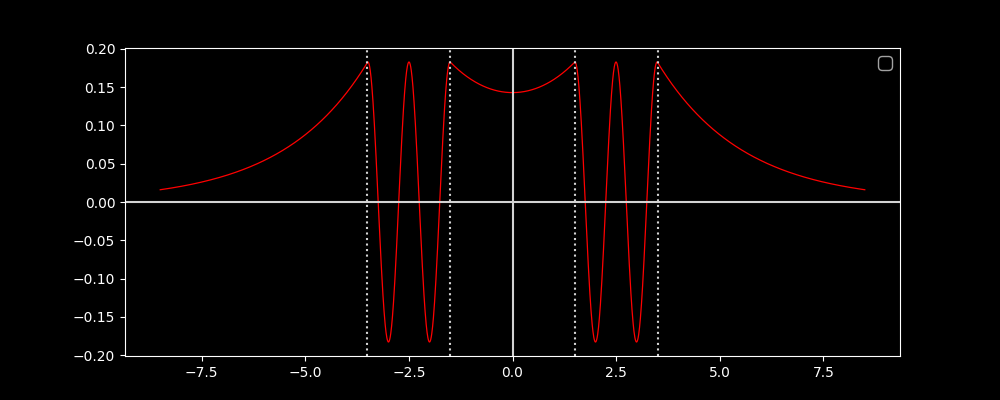

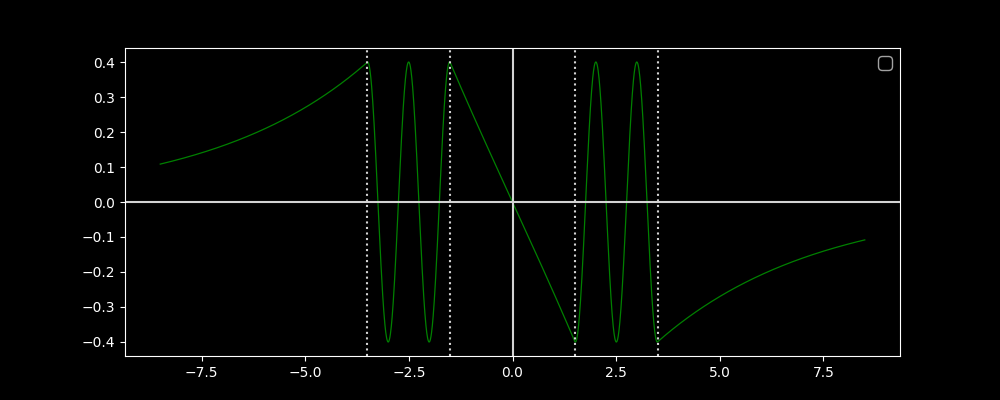

In [153]:
A.plot_field_1d(Fs5, linewidth=.9, color='r', figsize=(10,4))
A.plot_field_1d(Fs6, linewidth=.9, color='g', figsize=(10,4), close_others=False)
